1.문제 정의

#### 악성(malignant)과 양성(benign)종양을 예측

#### 지도학습/분류

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset= load_breast_cancer()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

데이터 전처리

In [6]:
import pandas as pd

In [7]:
x=pd.DataFrame(dataset.data, columns=dataset.feature_names)
y=pd.Series(dataset.target,name='cancer')


In [8]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
x.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89  

In [10]:
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: cancer, Length: 569, dtype: int32>

In [11]:
y.value_counts()

1    357
0    212
Name: cancer, dtype: int64

In [12]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
for i in range(2):
    y[y==i] = dataset.target_names[i]

####  eda

In [14]:
#데이터 합쳐줌  씨본에서 휴로 기준을 세울수있는데 y값을 합쳐줘야 그릴수있음
cancer= pd.concat([x,y],axis=1)
cancer.shape

(569, 31)

### -boxplot

In [16]:
import seaborn as sns#
import matplotlib.pyplot as plt
%matplotlib inline

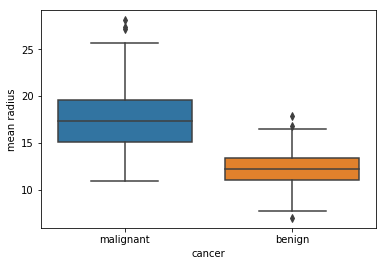

In [17]:
sns.boxplot(data=cancer, x='cancer', y='mean radius')

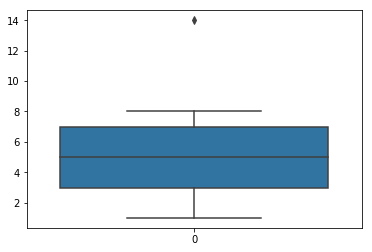

In [21]:
num = [1,2,3,4,5,6,7,8,14]
sns.boxplot(data=num)

In [25]:
cancer.columns


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'cancer'],
      dtype='object')

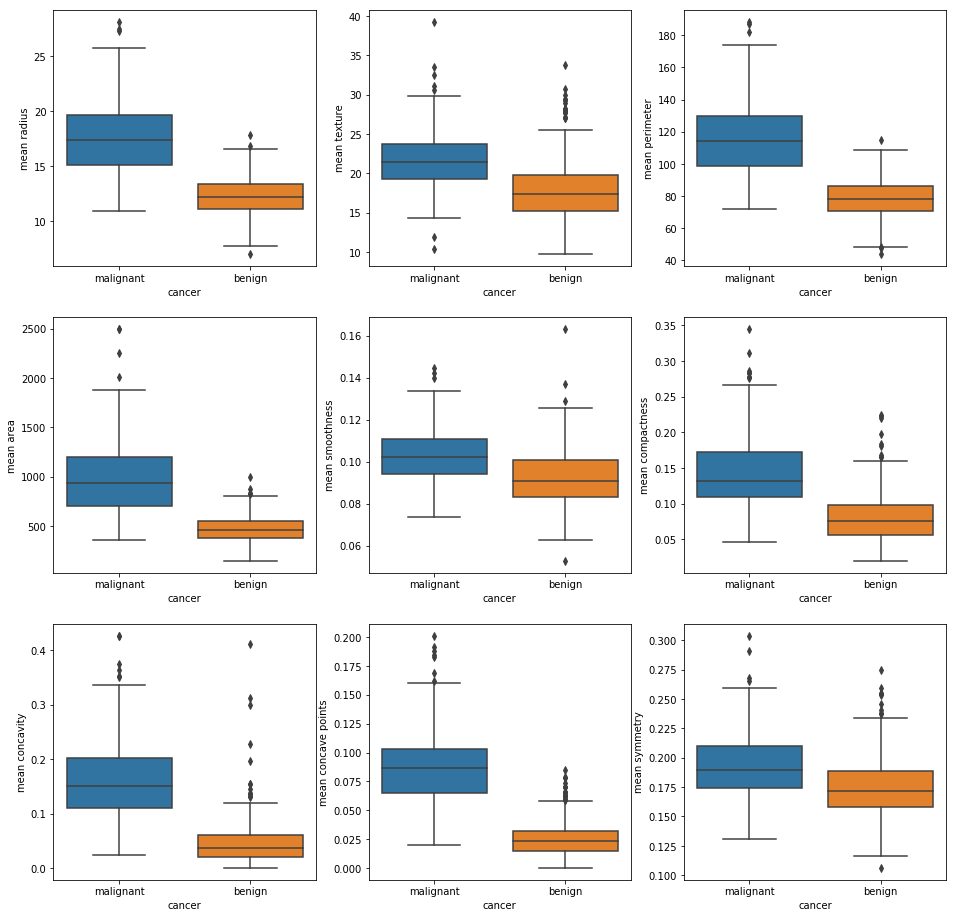

In [29]:
fitgure, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=\
plt.subplots(nrows=3,ncols=3)
fitgure.set_size_inches(16,16)
sns.boxplot(data=cancer, x='cancer', y='mean radius',ax=ax1)
sns.boxplot(data=cancer, x='cancer', y='mean texture',ax=ax2)
sns.boxplot(data=cancer, x='cancer', y='mean perimeter',ax=ax3)
sns.boxplot(data=cancer, x='cancer', y='mean area',ax=ax4)
sns.boxplot(data=cancer, x='cancer', y='mean smoothness',ax=ax5)
sns.boxplot(data=cancer, x='cancer', y='mean compactness',ax=ax6)
sns.boxplot(data=cancer, x='cancer', y='mean concavity',ax=ax7)
sns.boxplot(data=cancer, x='cancer', y='mean concave points',ax=ax8)
sns.boxplot(data=cancer, x='cancer', y='mean symmetry',ax=ax9)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test=train_test_split(x,y,stratify=y, random_state=1, test_size=0.3)

In [34]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [35]:
knn.score(x_test,y_test)

0.9122807017543859

In [39]:
for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print('k가{}일때'.format(i))
    print('정확도 : {}'.format(knn.score(x_test,y_test)))

k가1일때
정확도 : 0.9122807017543859
k가3일때
정확도 : 0.9064327485380117
k가5일때
정확도 : 0.9239766081871345
k가7일때
정확도 : 0.9298245614035088
k가9일때
정확도 : 0.9415204678362573
k가11일때
정확도 : 0.9415204678362573
k가13일때
정확도 : 0.935672514619883
k가15일때
정확도 : 0.9298245614035088
k가17일때
정확도 : 0.9181286549707602
k가19일때
정확도 : 0.9181286549707602
k가21일때
정확도 : 0.9122807017543859
k가23일때
정확도 : 0.9122807017543859
k가25일때
정확도 : 0.9122807017543859
k가27일때
정확도 : 0.9122807017543859
k가29일때
정확도 : 0.9122807017543859


In [42]:
train_acc= []
test_acc= []
neighbors=range(1,30,2)
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))

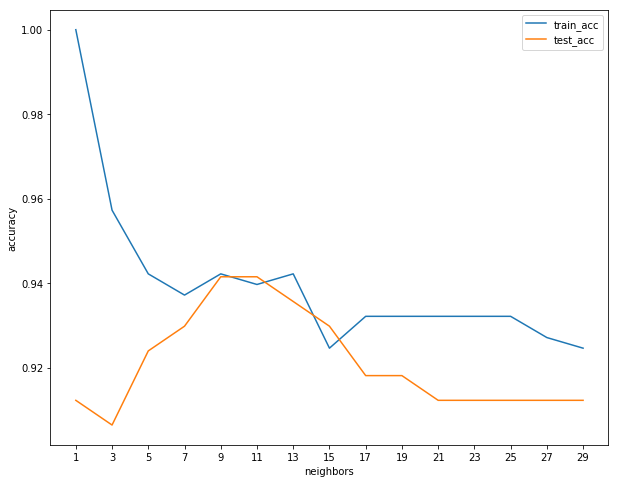

In [52]:

plt.figure(figsize=(10,8))
plt.plot(neighbors, train_acc, label='train_acc')
plt.plot(neighbors, test_acc, label='test_acc')
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.xticks(neighbors)
plt.legend()

In [55]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9415204678362573

## 표준스케일

In [57]:
from sklearn.preprocessing import StandardScaler 

In [92]:
scaler=StandardScaler()

In [93]:
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
x_test_sc=scaler.transform(x_test)


C:\Users\pc-23\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


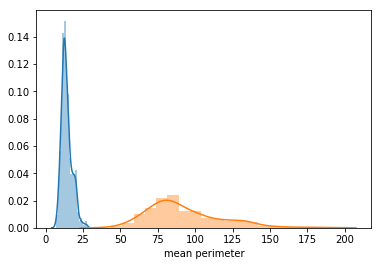

In [72]:
sns.distplot(x_train['mean radius'])
sns.distplot(x_train['mean perimeter'])

In [69]:
x_train_sc=pd.DataFrame(x_test_sc, columns=x_train.columns)

C:\Users\pc-23\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


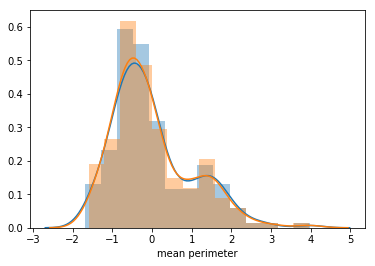

In [71]:
sns.distplot(x_train_sc['mean radius'])
sns.distplot(x_train_sc['mean perimeter'])   #정규분포

In [91]:
x_train.shape

(398, 30)

In [94]:
x_train_sc.shape

(398, 30)

In [89]:
y_train.shape

(398,)

In [95]:
train_acc = []
test_acc = []
neighbors = range(1,30,2)
for k in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sc,y_train)
    train_acc.append(knn.score(x_train_sc,y_train))
    test_acc.append(knn.score(x_test_sc,y_test))

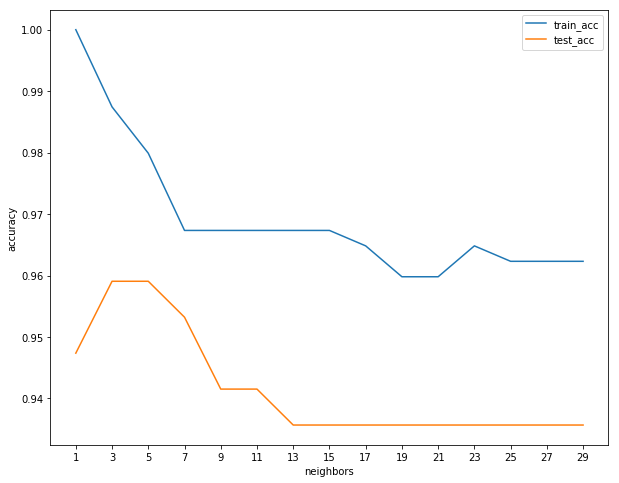

In [96]:

plt.figure(figsize=(10,8))
plt.plot(neighbors, train_acc, label='train_acc')
plt.plot(neighbors, test_acc, label='test_acc')
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.xticks(neighbors)
plt.legend()

### - confusion matrix(오차행렬)

In [81]:
import numpy as np
from sklearn import metrics

In [83]:
voice_pre=np.array([0,0,1,1,1,1])
voice_real=np.array([0,0,0,0,1,1])

In [84]:
metrics.confusion_matrix(voice_real,voice_pre)

array([[2, 2],
       [0, 2]], dtype=int64)

In [85]:
print(metrics.classification_report(voice_real,voice_pre))

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         4
          1       0.50      1.00      0.67         2

avg / total       0.83      0.67      0.67         6



In [97]:
print(metrics.classification_report(y_test,knn.predict(x_test_sc)))

             precision    recall  f1-score   support

     benign       0.91      0.99      0.95       107
  malignant       0.98      0.84      0.91        64

avg / total       0.94      0.94      0.93       171

